In [45]:
import numpy as np
from numpy.linalg import *
import time
from scipy.linalg import expm
import matplotlib.pyplot as plt
import sympy as sp
from sympy import init_session
init_session()

IPython console for SymPy 1.13.3 (Python 3.13.2-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



# Actividad:

1. Construir un programa que permita multiplicar dos matrices





In [56]:
def multiplicar_matrices(A, B):
    filas_A = len(A)
    columnas_A = len(A[0])
    filas_B = len(B)
    columnas_B = len(B[0])

    if columnas_A != filas_B:
        raise ValueError("No se pueden multiplicar: columnas de A ≠ filas de B")

    resultado = []
    for i in range(filas_A):
        fila = []
        for j in range(columnas_B):
            fila.append(0)
        resultado.append(fila)

    for i in range(filas_A):
        for j in range(columnas_B):
            for k in range(columnas_A):
                resultado[i][j] += A[i][k] * B[k][j]

    return resultado


A = [
    [1, 2],
    [3, 4]
]

B = [
    [5, 6],
    [7, 8]
]
display(sp.Matrix(A))
display(sp.Matrix(B))

resultado = multiplicar_matrices(A, B)

print("Resultado de A x B:")
display(sp.Matrix(resultado))


⎡1  2⎤
⎢    ⎥
⎣3  4⎦

⎡5  6⎤
⎢    ⎥
⎣7  8⎦

Resultado de A x B:


⎡19  22⎤
⎢      ⎥
⎣43  50⎦

2. Cosntruir un programa que permita construir una regresion lineal simple empleando lo que sigue:

3. Construir un programa que permita calcular una regresion bidimensional y hacer su representación .


Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresion lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial para enoncontrar el conjunto de parametros de la regresión. En este último caso, la regresion lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y y los valos esperados, así, si tenemos una conjunto de datos en N dimensiones la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, tenemos lo siguiente, Supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por:


- Sea $\vec{X}=x^1, x^2, x^3, x^4, ..., x^m$
- Sea $\vec{Y}=y^1, y^2, y^3, y^4, ..., y^m$

Para determinar la ecuacion de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{i} = \theta_1 x^{i} + \theta_0$ la anterior expresion puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{1}\\
y^{2}\\
\vdots\\
y^{m}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{1} & x_1^{2} & \cdots & x_1^{m} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{1} \\
1 & x_1^{2} \\
\vdots & \vdots \\
1 & x_1^{m}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots\\
y^m
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```


In [29]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
X = np.c_[ np.ones(len(x1)), x1.T ]


print(X.shape)

display(sp.Matrix(y))
display(sp.Matrix(X))


(10, 2)


⎡-0.358099592058455⎤
⎢                  ⎥
⎢0.144364573817033 ⎥
⎢                  ⎥
⎢ 2.81230458817152 ⎥
⎢                  ⎥
⎢ 2.95664217989479 ⎥
⎢                  ⎥
⎢ 4.8112596048095  ⎥
⎢                  ⎥
⎢ 5.58603619795873 ⎥
⎢                  ⎥
⎢ 5.62791438058641 ⎥
⎢                  ⎥
⎢ 7.78705723030549 ⎥
⎢                  ⎥
⎢ 7.93057075937145 ⎥
⎢                  ⎥
⎣ 9.70071320801611 ⎦

⎡1.0        0.0       ⎤
⎢                     ⎥
⎢1.0  1.11111111111111⎥
⎢                     ⎥
⎢1.0  2.22222222222222⎥
⎢                     ⎥
⎢1.0  3.33333333333333⎥
⎢                     ⎥
⎢1.0  4.44444444444444⎥
⎢                     ⎥
⎢1.0  5.55555555555556⎥
⎢                     ⎥
⎢1.0  6.66666666666667⎥
⎢                     ⎥
⎢1.0  7.77777777777778⎥
⎢                     ⎥
⎢1.0  8.88888888888889⎥
⎢                     ⎥
⎣1.0        10.0      ⎦

In [30]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y
theta = theta.reshape(-1,1)
display(sp.Matrix(theta))




⎡-0.17362682069763⎤
⎢                 ⎥
⎣0.974700626756978⎦

In [31]:
Y = X @ theta
display(sp.Matrix(Y).transpose())

[-0.17362682069763  0.909373875699012  1.99237457209565  3.0753752684923  4.15 ↪

↪ 837596488894  5.24137666128558  6.32437735768222  7.40737805407887  8.490378 ↪

↪ 75047551  9.57337944687215]

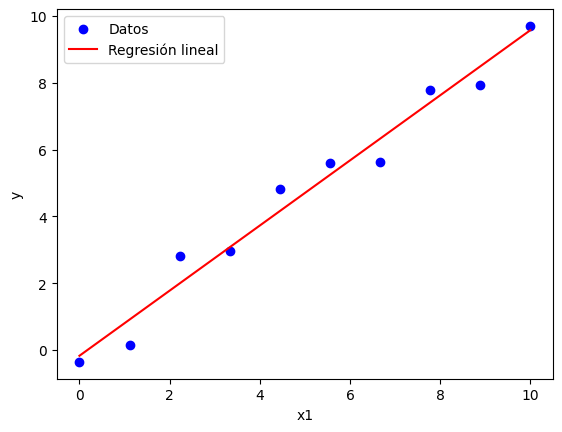

In [ ]:
plt.scatter(x1, y, label="Datos", color="blue")
plt.plot(x1, Y, label="Regresión lineal", color="red")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()



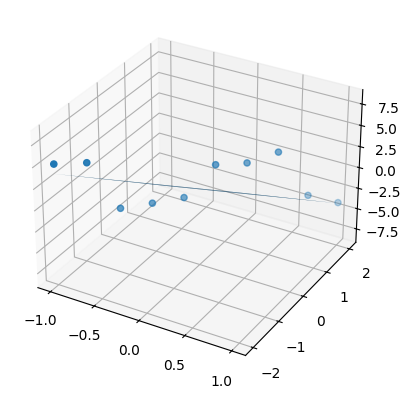

In [33]:
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2)  + 4*np.random.random(10)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
scatter = ax.scatter(x1, x2, y,"-")

In [34]:
X = np.c_[ np.ones(len(x1)),x1,x2 ]
display(sp.Matrix(X))

⎡1.0         -1.0                -2.0       ⎤
⎢                                           ⎥
⎢1.0  -0.777777777777778  -1.55555555555556 ⎥
⎢                                           ⎥
⎢1.0  -0.555555555555556  -1.11111111111111 ⎥
⎢                                           ⎥
⎢1.0  -0.333333333333333  -0.666666666666667⎥
⎢                                           ⎥
⎢1.0  -0.111111111111111  -0.222222222222222⎥
⎢                                           ⎥
⎢1.0  0.111111111111111   0.222222222222222 ⎥
⎢                                           ⎥
⎢1.0  0.333333333333333   0.666666666666667 ⎥
⎢                                           ⎥
⎢1.0  0.555555555555555    1.11111111111111 ⎥
⎢                                           ⎥
⎢1.0  0.777777777777778    1.55555555555556 ⎥
⎢                                           ⎥
⎣1.0         1.0                 2.0        ⎦

In [35]:
theta = np.linalg.pinv(X.T @ X) @ X.T @ y
theta = theta
display(sp.Matrix(theta))


⎡0.885233340504106 ⎤
⎢                  ⎥
⎢-0.537716093030006⎥
⎢                  ⎥
⎣-1.07543218606001 ⎦

In [36]:
X1, X2 = np.meshgrid(x1, x2)  # Crear una malla
Y_pred = theta[0] + theta[1] * X1 + theta[2] * X2 

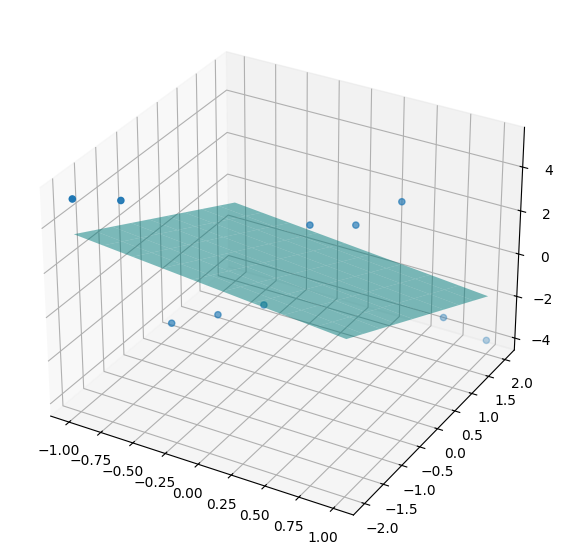

In [37]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Y_pred, alpha=0.5, color='cyan')

ax.scatter(x1,x2,y)






4. Construir un programa que permita realizar eliminacion de Gauss- Jordan de una matriz

In [65]:
def gauss_jordan(matriz):
    filas = len(matriz)
    columnas = len(matriz[0])

    for i in range(filas):
        pivote = matriz[i][i]
        if pivote == 0:
            raise ValueError("La matriz no tiene inversa")
        for j in range(columnas):
            matriz[i][j] /= pivote

        for k in range(filas):
            if k != i:
                factor = matriz[k][i]
                for j in range(columnas):
                    matriz[k][j] -= factor * matriz[i][j]

    return matriz


A = sp.Matrix([[2, 1, -1],
               [-3, -1, 2],
               [-2, 1, 2]])

b = sp.Matrix([8, -11, -3])

aumentada = A.row_join(b)

display(aumentada)

A_inv = gauss_jordan(aumentada.tolist())
display(sp.Matrix(A_inv))


⎡2   1   -1   8 ⎤
⎢               ⎥
⎢-3  -1  2   -11⎥
⎢               ⎥
⎣-2  1   2   -3 ⎦

⎡1  0  0  2 ⎤
⎢           ⎥
⎢0  1  0  3 ⎥
⎢           ⎥
⎣0  0  1  -1⎦